In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../Data/daily_usr_cnt_with_holiday(cleaned).csv')

In [4]:
df = df[['date','year', 'month', 'day', 'weekday', 'weeknum', 'is_holiday', 'cnt']]

In [5]:
df.head()

,date,year,month,day,weekday,weeknum,is_holiday,cnt
0,2018-01-01,2018,1,1,0,1,1,9.0
1,2018-01-02,2018,1,2,1,1,0,22.0
2,2018-01-03,2018,1,3,2,1,0,23.0
3,2018-01-04,2018,1,4,3,1,0,11.0
4,2018-01-05,2018,1,5,4,1,0,21.0


In [6]:
val_train_data, test_data = train_test_split(df, test_size=0.15, shuffle=False) 
train_data, valid_data = train_test_split(val_train_data, test_size=1.5/8.5, shuffle=False)

In [7]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(510, 8)
(110, 8)
(110, 8)


In [8]:
X_param = ['year', 'month', 'day', 'weekday', 'weeknum', 'is_holiday']
y_param = ['cnt']

In [9]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100]
g_list = [0.001, 0.01, 0.1, 1, 10, 100]
k_list = ['linear', 'rbf', 'poly', 'sigmoid']

In [10]:
def grid_search_SVR(train_data, valid_data, c_list, g_list, k_list):
    # set data
    X_train = train_data[X_param]
    y_train = train_data[y_param]
    X_test = valid_data[X_param]
    y_test = valid_data[y_param]
    
    # scale data
    sc=StandardScaler()
    sc.fit(X_train)
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    
    results_df = pd.DataFrame(columns = ['kernel', 'C', 'gamma', 'MAE', 'MSE', 'RMSE', 'R2'])
    
    for k in k_list:
        print(k)
        if k == 'linear':
            g = "None"
            for c in c_list:                   
                # train model
                ksvr=SVR(kernel=k, C=c, max_iter = 1000000)
                ksvr.fit(X_train_std,y_train)

                # predict model
                y_test_pred=ksvr.predict(X_test_std) # kernel SVR을 이용한 #test set의 y예측치 구하기
                
                # get perfomance metric
                MAE = metrics.mean_absolute_error(y_test,y_test_pred)
                MSE = metrics.mean_squared_error(y_test,y_test_pred)
                RMSE = np.sqrt(MSE)
                R2=metrics.r2_score(y_test,y_test_pred)
                
                # add result
                to_append = [k, c, g, MAE, MSE, RMSE, R2]
                append_series = pd.Series(to_append, index = results_df.columns)
                results_df = results_df.append(append_series, ignore_index=True)
                    
        else:
            for c in c_list:
                for g in g_list:
                    print("({}, {})".format(c, g))
                    # train model
                    ksvr=SVR(kernel=k, C=c, gamma=g, max_iter = 1000000)
                    ksvr.fit(X_train_std,y_train)
                    
                    # predict model
                    y_test_pred=ksvr.predict(X_test_std) # kernel SVR을 이용한 #test set의 y예측치 구하기
                    
                    # get perfomance metric
                    MAE = metrics.mean_absolute_error(y_test,y_test_pred)
                    MSE = metrics.mean_squared_error(y_test,y_test_pred)
                    RMSE = np.sqrt(MSE)
                    R2=metrics.r2_score(y_test,y_test_pred)
                    
                    # add result                    
                    to_append = [k, c, g, MAE, MSE, RMSE, R2]
                    append_series = pd.Series(to_append, index = results_df.columns)
                    results_df = results_df.append(append_series, ignore_index=True)

    return results_df

In [11]:
svr_result = grid_search_SVR(train_data, valid_data, c_list, g_list, k_list)

linear
rbf
(0.001, 0.001)
(0.001, 0.01)
(0.001, 0.1)
(0.001, 1)
(0.001, 10)
(0.001, 100)
(0.01, 0.001)
(0.01, 0.01)
(0.01, 0.1)
(0.01, 1)
(0.01, 10)
(0.01, 100)
(0.1, 0.001)
(0.1, 0.01)
(0.1, 0.1)
(0.1, 1)
(0.1, 10)
(0.1, 100)
(1, 0.001)
(1, 0.01)
(1, 0.1)
(1, 1)
(1, 10)
(1, 100)
(10, 0.001)
(10, 0.01)
(10, 0.1)
(10, 1)
(10, 10)
(10, 100)
(100, 0.001)
(100, 0.01)
(100, 0.1)
(100, 1)
(100, 10)
(100, 100)
poly
(0.001, 0.001)
(0.001, 0.01)
(0.001, 0.1)
(0.001, 1)
(0.001, 10)
(0.001, 100)
(0.01, 0.001)
(0.01, 0.01)
(0.01, 0.1)
(0.01, 1)
(0.01, 10)
(0.01, 100)
(0.1, 0.001)
(0.1, 0.01)
(0.1, 0.1)
(0.1, 1)
(0.1, 10)
(0.1, 100)
(1, 0.001)
(1, 0.01)
(1, 0.1)
(1, 1)
(1, 10)
(1, 100)
(10, 0.001)
(10, 0.01)
(10, 0.1)
(10, 1)
(10, 10)
(10, 100)
(100, 0.001)
(100, 0.01)
(100, 0.1)
(100, 1)
(100, 10)
(100, 100)
sigmoid
(0.001, 0.001)
(0.001, 0.01)
(0.001, 0.1)
(0.001, 1)
(0.001, 10)
(0.001, 100)
(0.01, 0.001)
(0.01, 0.01)
(0.01, 0.1)
(0.01, 1)
(0.01, 10)
(0.01, 100)
(0.1, 0.001)
(0.1, 0.01)
(0.1, 0.1

In [12]:
svr_result.head()

,kernel,C,gamma,MAE,MSE,RMSE,R2
0,linear,0.001,None,128.058324,18260.731729,135.132275,-8.815056
1,linear,0.010,None,128.311686,18336.533617,135.412457,-8.855799
2,linear,0.100,None,124.618063,17468.431496,132.168194,-8.389199
3,linear,1.000,None,112.257181,14503.575553,120.430792,-6.795603
4,linear,10.000,None,109.148108,13807.093476,117.503589,-6.421247


In [13]:
svr_result=svr_result.sort_values(by=['MAE'], axis=0)
svr_result

,kernel,C,gamma,MAE,MSE,RMSE,R2
38,rbf,100.0,0.1,54.226325,4.839614e+03,69.567331,-1.601269
74,poly,100.0,0.1,61.474405,5.569638e+03,74.630008,-1.993654
57,poly,0.1,1,61.474452,5.569647e+03,74.630067,-1.993659
39,rbf,100.0,1,67.892565,6.322928e+03,79.516840,-2.398544
32,rbf,10.0,0.1,72.910774,6.750624e+03,82.162181,-2.628428
...,...,...,...,...,...,...,...
106,sigmoid,10.0,10,395.309619,2.260995e+05,475.499223,-120.527410
107,sigmoid,10.0,100,437.495299,3.003442e+05,548.036673,-160.433573
111,sigmoid,100.0,1,2116.325265,7.067048e+06,2658.391944,-3797.504481
113,sigmoid,100.0,100,3323.657884,1.692293e+07,4113.749153,-9094.995365


In [14]:
best_kernel = svr_result.iloc[0][0]
best_C = svr_result.iloc[0][1]
best_gamma = svr_result.iloc[0][2]
print(best_kernel, '/', best_C, '/', best_gamma)

rbf / 100.0 / 0.1


### Try with best params

In [15]:
# try with best param
X_train = train_data[X_param]
y_train = train_data[y_param]
X_test = valid_data[X_param]
y_test = valid_data[y_param]

# scale data
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

# run model
ksvr=SVR(kernel=best_kernel, C=best_C, gamma = best_gamma, max_iter = 1000000)
ksvr.fit(X_train_std,y_train)

# predict model
y_train_pred=ksvr.predict(X_train_std) # kernel SVR을 이용한 #test set의 y예측치 구하기
y_test_pred=ksvr.predict(X_test_std) # kernel SVR을 이용한 #test set의 y예측치 구하기

In [16]:
y_train

,cnt
0,9.0
1,22.0
2,23.0
3,11.0
4,21.0
...,...
505,189.0
506,218.0
507,228.0
508,217.0


In [17]:
train_data['date']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
505    2019-05-21
506    2019-05-22
507    2019-05-23
508    2019-05-24
509    2019-05-25
Name: date, Length: 510, dtype: object

In [18]:
train_viz = pd.DataFrame({'date' : train_data['date'], 
                          'y_train_true' : y_train.iloc[:,-1].values, 
                          'y_train_pred' : y_train_pred})
train_viz.head()

,date,y_train_true,y_train_pred
0,2018-01-01,9.0,9.100382
1,2018-01-02,22.0,21.899781
2,2018-01-03,23.0,18.967930
3,2018-01-04,11.0,17.080369
4,2018-01-05,21.0,15.619100


In [19]:
valid_data['date']

510    2019-05-26
511    2019-05-27
512    2019-05-28
513    2019-05-29
514    2019-05-30
          ...    
615    2019-09-08
616    2019-09-09
617    2019-09-10
618    2019-09-11
619    2019-09-12
Name: date, Length: 110, dtype: object

In [20]:
valid_viz = pd.DataFrame({'date' : valid_data['date'], 
                          'y_valid_true' : y_test.iloc[:,-1].values, 
                          'y_valid_pred' : y_test_pred})
valid_viz.head()

,date,y_valid_true,y_valid_pred
510,2019-05-26,195.0,144.875808
511,2019-05-27,184.0,178.108600
512,2019-05-28,191.4,188.109855
513,2019-05-29,198.8,190.982534
514,2019-05-30,206.2,185.582170


In [22]:
import numpy as np
import plotly.graph_objects as go

# https://community.plotly.com/t/plotly-colours-list/11730/2

fig=go.Figure()
fig.add_trace(go.Scatter(x=train_viz['date'], y=train_viz['y_train_true'],mode='lines', 
                         line = dict(color = '#1f77b4'), name='y_true')) # muted blue
fig.add_trace(go.Scatter(x=train_viz['date'], y=train_viz['y_train_pred'],mode='lines',
                         line = dict(color = '#ff7f0e'), name='y_pred')) # safety orange
fig.add_trace(go.Scatter(x=valid_viz['date'], y=valid_viz['y_valid_true'],mode='lines',
                         line = dict(color = '#1f77b4'), name='y_true')) # muted blue
fig.add_trace(go.Scatter(x=valid_viz['date'], y=valid_viz['y_valid_pred'],mode='lines',
                         line = dict(color = '#bcbd22'),name='y_pred')) # curry yellow-green
fig.show()

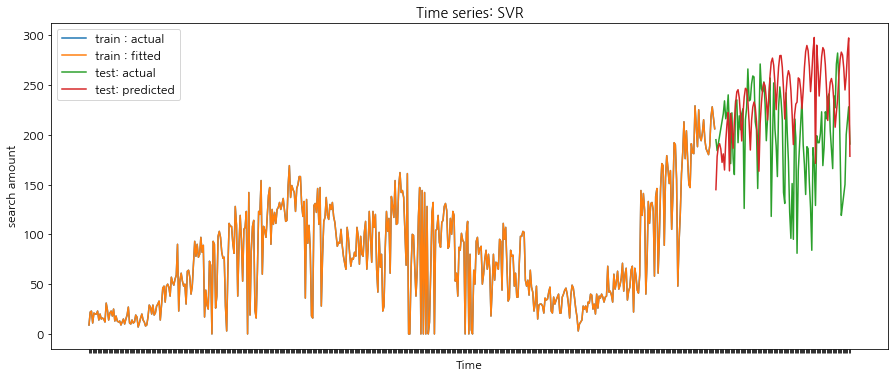

In [23]:
# Plot outputs
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(train_viz['date'], train_viz['y_train_true'], color='tab:blue', label='train : actual')
ax.plot(train_viz['date'], train_viz['y_train_true'], color='tab:orange', label='train : fitted')
ax.plot(valid_viz['date'], valid_viz['y_valid_true'], color='tab:green', label='test: actual')
ax.plot(valid_viz['date'], valid_viz['y_valid_pred'], color='tab:red', label='test: predicted')

ax.set_xlabel('Time')
ax.set_xticklabels([], rotation =45)
ax.set_ylabel('search amount')
ax.set_title('Time series: SVR')
ax.legend(loc='upper left')

In [ ]:
# 아직 미완성
plt.figure(figsize=(5, 5))
plt.title('Various hyper-parameters', fontsize=10)

plt.xlabel("C")
plt.ylabel("Score")

ax = plt.gca()
#ax.set_xlim(0, 100)
ax.set_ylim(-15, 100)

X_axis = C

mae = []
mse = []
mape = []
r2 = []

for i in range(len(score_total_ni)):
    if (score_total_ni['Hyper-parameter'][i][0] == 'poly') and (score_total_ni['Hyper-parameter'][i][2] == 1) and (score_total_ni['Hyper-parameter'][i][3] == 3):
        mae.append(score_totalz_ni['MAE'][i]/100)
        mse.append(score_total_ni['MSE'][i]/10000000)
        mape.append(score_total_ni['MAPE'][i])
        r2.append(score_total_ni['R2'][i])
    
        
x = np.linspace(0,len(X_axis)+1,len(X_axis))
ax.plot(x, mae, color='g',alpha=1, label = 'MAE / 10^2')
ax.plot(x, mse, color='r',alpha=1, label = 'MSE / 10^7')
ax.plot(x, mape, color='silver',alpha=1, label = 'MAPE')
ax.plot(x, r2, color='b',alpha=1, label = 'R2')
plt.xticks(x,X_axis)
plt.legend()